# TP - Environnement Snake

Les entrainements d'agents de ce notebook peuvent être gourmands en puissance de calcul. Si votre machine est trop lente, basculez sur Colab.

Pour commencer, quelques cellules utilitaires pour une meilleure expérience *noteboook* :

In [1]:
#Uniquement utilse sous Colab
import sys
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
    !rm -rf ESGI-M2-IABD/
    !git clone https://github.com/pcouy/ESGI-M2-IABD
    !pip install --upgrade pip
    !pip install ESGI-M2-IABD/code

In [1]:
# Modification de la taille des sorties scrollables
# Rend également les sorties scrollables redimensionnables
from IPython.display import HTML, Image, display
HTML("""
<style>
.jp-CodeCell.jp-mod-outputsScrolled .jp-Cell-outputArea, div.output_scroll { max-height: 70vh; height:70vh; resize: vertical;}
</style>
""")

In [3]:
%matplotlib inline

In [2]:
# Fonctions utilitaires pour afficher interactivement les vidéos des épisodes de test
# ATTENTION : Le slider de view_videos ne fonctionne que s'il n'y a pas d'exécution déjà en cours !
import os, io, glob, base64, threading
from ipywidgets import interact, widgets
from IPython.display import HTML, Image, display

def load_and_display(path):
    """Show a video at `path` within IPython Notebook."""
    if not os.path.isfile(path):
        raise NameError("Cannot access: {}".format(path))

    video = io.open(path, "r+b").read()
    encoded = base64.b64encode(video)

    display(HTML(
        data="""
        <video alt="test" controls>
        <source src="data:video/mp4;base64,{0}" type="video/mp4"/>
        </video>
        """.format(encoded.decode("ascii"))
    ))

def show_last_video(agent_save_dir):
    dirname = os.path.join(agent_save_dir, "videos")
    files = sorted([f for f in os.listdir(dirname)])
    file = files[-1]
    path = os.path.join(dirname, file, "rl-video-episode-0.mp4")
    load_and_display(path)

def view_videos(agent):
    dirname = os.path.join(agent.save_dir, "videos")
    files = sorted([f for f in os.listdir(dirname)])
    print(files)
    N = len(files)
    def d(file: str) -> None:
        path = os.path.join(dirname, file, "rl-video-episode-0.mp4")
        load_and_display(path)
    interact(d, file=widgets.SelectionSlider(options=files, value=files[-1]))

## Agent tabulaire

La cellule ci-dessous donne un exemple d'entraînement d'agent tabulaire sur le jeu Snake. Lancez la cellule, et constatez l'apprentissage de l'agent avec les données de sorties (dossier `results`)

In [4]:
import code_tp as TP
from code_tp import agents, value_functions, policies
from code_tp import wrappers
import gym

In [5]:
env = agents.snake.make_tabular_snake_env(8,4)
env = wrappers.utils.BoredomWrapper(env)
a=TP.create_agent_from_env(env,
agent_class=agents.base.QLearningAgent,
value_class=value_functions.tabular.TabularQValue,
policy_class=policies.greedy.EGreedyPolicy,
agent_args={
    'gamma':0.99
},
value_args={
    'lr':0.1, 'lr_decay':5e-7, 'lr_min':0.05,
    'default_value': 1
},
policy_args={
    'greedy_policy_class': policies.greedy.GreedyQPolicy,
    'epsilon': 1, 'epsilon_decay': 5e-6, 'epsilon_min': 0.0,
    'epsilon_test':0
})
a.train(10000, 500, test_callbacks=[show_last_video])

/home/pierre/.local/lib/python3.9/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(


{'agent_class': 'QLearningAgent', 'value_class': 'TabularQValue', 'policy_class': 'EGreedyPolicy', 'agent_args': {'gamma': 0.99, 'save_dir': 'results/20211130-110556-.BoredomWrapper.TabularObservation.LogScaleObs.SnakeFeatureObservation.AddDirectionToSnakeState.OrderEnforcing.Snake_8x8.Snake-8x8-v0'}, 'value_args': {'lr': 0.1, 'lr_decay': 5e-07, 'lr_min': 0.05, 'default_value': 1}, 'policy_args': {'greedy_policy_class': <class 'code_tp.policies.greedy.GreedyQPolicy'>, 'epsilon': 1, 'epsilon_decay': 5e-06, 'epsilon_min': 0.0, 'epsilon_test': 0}}
Training episode (1) done with score = -1.06
Training episode (2) done with score = -1.05
Training episode (3) done with score = -1.09
Training episode (4) done with score = -1.02
Training episode (5) done with score = -1.14
Training episode (6) done with score = -1.06
Training episode (7) done with score = -1.02
Training episode (8) done with score = -1.1
Training episode (9) done with score = -1.04
Training episode (10) done with score = -1.15

Training episode (501) done with score = -1.01
Training episode (502) done with score = -1.03
Training episode (503) done with score = -1.01
Training episode (504) done with score = -1.01
Training episode (505) done with score = -1.01
Training episode (506) done with score = -1.09
Training episode (507) done with score = -1.01
Training episode (508) done with score = -1.08
Training episode (509) done with score = -1.08
Training episode (510) done with score = -1.05
Training episode (511) done with score = -1.05
Training episode (512) done with score = -1.14
Training episode (513) done with score = -1.01
Training episode (514) done with score = -1.15
Training episode (515) done with score = -1.01
Training episode (516) done with score = -1.02
Training episode (517) done with score = -1.02
Training episode (518) done with score = -1.01
Training episode (519) done with score = -1.03
Training episode (520) done with score = -1.01
Training episode (521) done with score = -1.02
Training epis

Training episode (1001) done with score = -1.1
Training episode (1002) done with score = -1.03
Training episode (1003) done with score = -1.04
Training episode (1004) done with score = -1.05
Training episode (1005) done with score = -1.01
Training episode (1006) done with score = -1.08
Training episode (1007) done with score = -1.12
Training episode (1008) done with score = -1.03
Training episode (1009) done with score = -1.01
Training episode (1010) done with score = -1.25
Training episode (1011) done with score = -1.13
Training episode (1012) done with score = -1.04
Training episode (1013) done with score = -1.2
Training episode (1014) done with score = -1.04
Training episode (1015) done with score = -1.02
Training episode (1016) done with score = -1.09
Training episode (1017) done with score = -1.03
Training episode (1018) done with score = -1.08
Training episode (1019) done with score = -1.09
Training episode (1020) done with score = -1.04
Training episode (1021) done with score = 

Training episode (1501) done with score = -1.02
Training episode (1502) done with score = -1.03
Training episode (1503) done with score = -1.1
Training episode (1504) done with score = -1.01
Training episode (1505) done with score = -1.01
Training episode (1506) done with score = -1.01
Training episode (1507) done with score = -1.03
Training episode (1508) done with score = -1.04
Training episode (1509) done with score = -1.05
Training episode (1510) done with score = -1.04
Training episode (1511) done with score = -1.04
Training episode (1512) done with score = -0.14
Training episode (1513) done with score = -1.03
Training episode (1514) done with score = -1.03
Training episode (1515) done with score = -1.03
Training episode (1516) done with score = -1.1
Training episode (1517) done with score = -0.030000000000000027
Training episode (1518) done with score = -1.03
Training episode (1519) done with score = -1.02
Training episode (1520) done with score = -1.17
Training episode (1521) do

Training episode (2001) done with score = -1.05
Training episode (2002) done with score = -1.03
Training episode (2003) done with score = -1.04
Training episode (2004) done with score = -1.01
Training episode (2005) done with score = -1.08
Training episode (2006) done with score = -1.01
Training episode (2007) done with score = -1.06
Training episode (2008) done with score = -1.13
Training episode (2009) done with score = -1.06
Training episode (2010) done with score = -1.06
Training episode (2011) done with score = -1.02
Training episode (2012) done with score = -1.09
Training episode (2013) done with score = -1.04
Training episode (2014) done with score = -1.05
Training episode (2015) done with score = -1.01
Training episode (2016) done with score = -1.07
Training episode (2017) done with score = -0.07000000000000006
Training episode (2018) done with score = -0.07000000000000006
Training episode (2019) done with score = -1.03
Training episode (2020) done with score = -0.0200000000000

Training episode (2501) done with score = -1.09
Training episode (2502) done with score = -1.01
Training episode (2503) done with score = -1.02
Training episode (2504) done with score = -1.03
Training episode (2505) done with score = -1.05
Training episode (2506) done with score = -1.04
Training episode (2507) done with score = -1.03
Training episode (2508) done with score = -1.01
Training episode (2509) done with score = -0.030000000000000027
Training episode (2510) done with score = -1.01
Training episode (2511) done with score = -1.09
Training episode (2512) done with score = -0.020000000000000018
Training episode (2513) done with score = -1.04
Training episode (2514) done with score = -1.1
Training episode (2515) done with score = -1.04
Training episode (2516) done with score = -1.01
Training episode (2517) done with score = -1.03
Training episode (2518) done with score = -1.02
Training episode (2519) done with score = -1.04
Training episode (2520) done with score = -1.01
Training 

Training episode (3001) done with score = -1.01
Training episode (3002) done with score = -1.08
Training episode (3003) done with score = -1.04
Training episode (3004) done with score = -1.14
Training episode (3005) done with score = -1.03
Training episode (3006) done with score = -1.02
Training episode (3007) done with score = -0.1100000000000001
Training episode (3008) done with score = -1.03
Training episode (3009) done with score = -1.06
Training episode (3010) done with score = -1.09
Training episode (3011) done with score = -1.07
Training episode (3012) done with score = -1.01
Training episode (3013) done with score = -1.04
Training episode (3014) done with score = -1.03
Training episode (3015) done with score = -0.17000000000000015
Training episode (3016) done with score = -0.06000000000000005
Training episode (3017) done with score = -1.03
Training episode (3018) done with score = -1.02
Training episode (3019) done with score = -1.1
Training episode (3020) done with score = -1.

Training episode (3501) done with score = -1.01
Training episode (3502) done with score = -1.01
Training episode (3503) done with score = -1.02
Training episode (3504) done with score = -1.12
Training episode (3505) done with score = -1.01
Training episode (3506) done with score = -1.13
Training episode (3507) done with score = -0.06000000000000005
Training episode (3508) done with score = -1.05
Training episode (3509) done with score = -1.03
Training episode (3510) done with score = -1.06
Training episode (3511) done with score = -1.13
Training episode (3512) done with score = -1.01
Training episode (3513) done with score = -1.05
Training episode (3514) done with score = -1.05
Training episode (3515) done with score = -1.08
Training episode (3516) done with score = -1.02
Training episode (3517) done with score = -1.01
Training episode (3518) done with score = -1.05
Training episode (3519) done with score = -1.07
Training episode (3520) done with score = -1.03
Training episode (3521) d

Training episode (4001) done with score = -1.07
Training episode (4002) done with score = -1.03
Training episode (4003) done with score = -0.10000000000000009
Training episode (4004) done with score = -1.03
Training episode (4005) done with score = -1.01
Training episode (4006) done with score = -1.02
Training episode (4007) done with score = -1.05
Training episode (4008) done with score = -1.09
Training episode (4009) done with score = -0.07000000000000006
Training episode (4010) done with score = -1.11
Training episode (4011) done with score = -0.10000000000000009
Training episode (4012) done with score = -1.11
Training episode (4013) done with score = -1.07
Training episode (4014) done with score = -0.07000000000000006
Training episode (4015) done with score = -1.05
Training episode (4016) done with score = -1.03
Training episode (4017) done with score = -0.15000000000000013
Training episode (4018) done with score = -1.03
Training episode (4019) done with score = -1.05
Training epis

Training episode (4501) done with score = -1.04
Training episode (4502) done with score = -1.01
Training episode (4503) done with score = -1.07
Training episode (4504) done with score = -1.08
Training episode (4505) done with score = -1.04
Training episode (4506) done with score = -1.01
Training episode (4507) done with score = -1.04
Training episode (4508) done with score = -1.13
Training episode (4509) done with score = -1.02
Training episode (4510) done with score = -1.15
Training episode (4511) done with score = -1.05
Training episode (4512) done with score = -1.01
Training episode (4513) done with score = -1.01
Training episode (4514) done with score = -1.16
Training episode (4515) done with score = -1.05
Training episode (4516) done with score = -1.05
Training episode (4517) done with score = -1.04
Training episode (4518) done with score = -1.08
Training episode (4519) done with score = -1.09
Training episode (4520) done with score = -1.03
Training episode (4521) done with score 

Training episode (5001) done with score = -1.09
Training episode (5002) done with score = -0.2300000000000002
Training episode (5003) done with score = -1.03
Training episode (5004) done with score = -1.04
Training episode (5005) done with score = -1.02
Training episode (5006) done with score = -1.02
Training episode (5007) done with score = -1.06
Training episode (5008) done with score = -1.15
Training episode (5009) done with score = -1.05
Training episode (5010) done with score = -1.05
Training episode (5011) done with score = -1.09
Training episode (5012) done with score = -1.05
Training episode (5013) done with score = -1.03
Training episode (5014) done with score = -1.04
Training episode (5015) done with score = -1.09
Training episode (5016) done with score = -1.01
Training episode (5017) done with score = -1.01
Training episode (5018) done with score = -1.05
Training episode (5019) done with score = -0.29000000000000015
Training episode (5020) done with score = -1.05
Training ep

Training episode (5501) done with score = -0.18000000000000005
Training episode (5502) done with score = -1.01
Training episode (5503) done with score = -0.040000000000000036
Training episode (5504) done with score = -1.05
Training episode (5505) done with score = -1.05
Training episode (5506) done with score = -1.01
Training episode (5507) done with score = -1.01
Training episode (5508) done with score = -1.03
Training episode (5509) done with score = -1.07
Training episode (5510) done with score = -1.01
Training episode (5511) done with score = -1.03
Training episode (5512) done with score = -1.05
Training episode (5513) done with score = -1.01
Training episode (5514) done with score = -0.030000000000000027
Training episode (5515) done with score = -1.01
Training episode (5516) done with score = -1.03
Training episode (5517) done with score = -1.19
Training episode (5518) done with score = -1.02
Training episode (5519) done with score = -1.02
Training episode (5520) done with score =

Training episode (6001) done with score = -1.03
Training episode (6002) done with score = -0.08000000000000007
Training episode (6003) done with score = -1.02
Training episode (6004) done with score = -0.10000000000000009
Training episode (6005) done with score = -1.08
Training episode (6006) done with score = -1.03
Training episode (6007) done with score = -1.05
Training episode (6008) done with score = -1.05
Training episode (6009) done with score = -1.1
Training episode (6010) done with score = -0.07000000000000006
Training episode (6011) done with score = -1.02
Training episode (6012) done with score = -1.1
Training episode (6013) done with score = -1.03
Training episode (6014) done with score = -1.01
Training episode (6015) done with score = -1.08
Training episode (6016) done with score = -1.01
Training episode (6017) done with score = -1.05
Training episode (6018) done with score = -1.09
Training episode (6019) done with score = -1.03
Training episode (6020) done with score = -1.

Training episode (6501) done with score = -1.22
Training episode (6502) done with score = -1.03
Training episode (6503) done with score = -1.16
Training episode (6504) done with score = -0.1100000000000001
Training episode (6505) done with score = -1.11
Training episode (6506) done with score = -1.05
Training episode (6507) done with score = -1.11
Training episode (6508) done with score = -1.1
Training episode (6509) done with score = -1.09
Training episode (6510) done with score = -0.08000000000000007
Training episode (6511) done with score = -1.03
Training episode (6512) done with score = -1.01
Training episode (6513) done with score = -1.01
Training episode (6514) done with score = -0.10999999999999999
Training episode (6515) done with score = -1.04
Training episode (6516) done with score = -1.01
Training episode (6517) done with score = -1.06
Training episode (6518) done with score = -1.19
Training episode (6519) done with score = -1.1
Training episode (6520) done with score = -1.0

Training episode (7001) done with score = -1.06
Training episode (7002) done with score = -1.03
Training episode (7003) done with score = -1.02
Training episode (7004) done with score = -1.2
Training episode (7005) done with score = -1.02
Training episode (7006) done with score = -1.05
Training episode (7007) done with score = -0.050000000000000044
Training episode (7008) done with score = -1.1
Training episode (7009) done with score = -1.16
Training episode (7010) done with score = -1.07
Training episode (7011) done with score = -1.14
Training episode (7012) done with score = -1.12
Training episode (7013) done with score = -1.04
Training episode (7014) done with score = -1.01
Training episode (7015) done with score = -1.04
Training episode (7016) done with score = -1.02
Training episode (7017) done with score = -1.02
Training episode (7018) done with score = -1.1
Training episode (7019) done with score = -1.06
Training episode (7020) done with score = -1.09
Training episode (7021) don

Training episode (7501) done with score = -1.02
Training episode (7502) done with score = 0.73
Training episode (7503) done with score = -1.07
Training episode (7504) done with score = -1.19
Training episode (7505) done with score = -1.08
Training episode (7506) done with score = -1.15
Training episode (7507) done with score = -1.02
Training episode (7508) done with score = -1.03
Training episode (7509) done with score = -0.1100000000000001
Training episode (7510) done with score = -1.04
Training episode (7511) done with score = -1.02
Training episode (7512) done with score = -1.01
Training episode (7513) done with score = -1.03
Training episode (7514) done with score = -1.06
Training episode (7515) done with score = -1.11
Training episode (7516) done with score = -1.06
Training episode (7517) done with score = -1.03
Training episode (7518) done with score = -1.03
Training episode (7519) done with score = -1.06
Training episode (7520) done with score = -1.05
Training episode (7521) don

Training episode (8001) done with score = -1.01
Training episode (8002) done with score = -1.01
Training episode (8003) done with score = -1.01
Training episode (8004) done with score = -0.06000000000000005
Training episode (8005) done with score = -1.07
Training episode (8006) done with score = -1.14
Training episode (8007) done with score = -1.03
Training episode (8008) done with score = -1.02
Training episode (8009) done with score = -1.04
Training episode (8010) done with score = -1.12
Training episode (8011) done with score = -0.18000000000000016
Training episode (8012) done with score = -1.03
Training episode (8013) done with score = -1.02
Training episode (8014) done with score = -1.04
Training episode (8015) done with score = -1.14
Training episode (8016) done with score = -1.04
Training episode (8017) done with score = -1.04
Training episode (8018) done with score = -1.13
Training episode (8019) done with score = -1.05
Training episode (8020) done with score = 2.56000000000000

Training episode (8501) done with score = 0.7899999999999998
Training episode (8502) done with score = -0.1200000000000001
Training episode (8503) done with score = -1.04
Training episode (8504) done with score = -1.31
Training episode (8505) done with score = -0.13000000000000012
Training episode (8506) done with score = -1.03
Training episode (8507) done with score = -1.05
Training episode (8508) done with score = -0.07000000000000006
Training episode (8509) done with score = -1.04
Training episode (8510) done with score = 0.79
Training episode (8511) done with score = -1.11
Training episode (8512) done with score = -1.03
Training episode (8513) done with score = -1.01
Training episode (8514) done with score = -1.1
Training episode (8515) done with score = -1.04
Training episode (8516) done with score = -1.25
Training episode (8517) done with score = -1.1
Training episode (8518) done with score = -0.14000000000000012
Training episode (8519) done with score = -1.04
Training episode (8

Training episode (9001) done with score = -1.03
Training episode (9002) done with score = -0.1200000000000001
Training episode (9003) done with score = -1.03
Training episode (9004) done with score = -1.01
Training episode (9005) done with score = 0.9199999999999999
Training episode (9006) done with score = -1.09
Training episode (9007) done with score = -1.02
Training episode (9008) done with score = -1.06
Training episode (9009) done with score = -1.08
Training episode (9010) done with score = -0.18000000000000016
Training episode (9011) done with score = -1.15
Training episode (9012) done with score = -1.24
Training episode (9013) done with score = -1.05
Training episode (9014) done with score = -1.09
Training episode (9015) done with score = -1.05
Training episode (9016) done with score = -1.05
Training episode (9017) done with score = -1.03
Training episode (9018) done with score = -1.09
Training episode (9019) done with score = 0.7099999999999997
Training episode (9020) done with

Training episode (9501) done with score = -1.03
Training episode (9502) done with score = -1.01
Training episode (9503) done with score = -0.13
Training episode (9504) done with score = -1.07
Training episode (9505) done with score = -1.05
Training episode (9506) done with score = 0.6099999999999999
Training episode (9507) done with score = -0.39000000000000024
Training episode (9508) done with score = -0.2600000000000001
Training episode (9509) done with score = -1.13
Training episode (9510) done with score = -1.01
Training episode (9511) done with score = -0.1200000000000001
Training episode (9512) done with score = -1.03
Training episode (9513) done with score = -0.20000000000000007
Training episode (9514) done with score = -1.13
Training episode (9515) done with score = -1.03
Training episode (9516) done with score = -1.07
Training episode (9517) done with score = -0.13000000000000012
Training episode (9518) done with score = -1.06
Training episode (9519) done with score = -1.07
Tr

<Figure size 432x288 with 0 Axes>

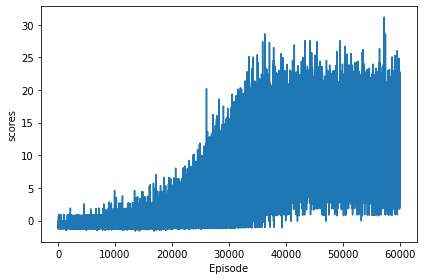

<Figure size 432x288 with 0 Axes>

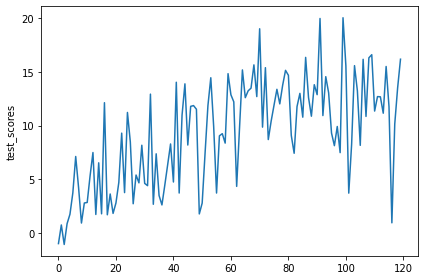

<Figure size 432x288 with 0 Axes>

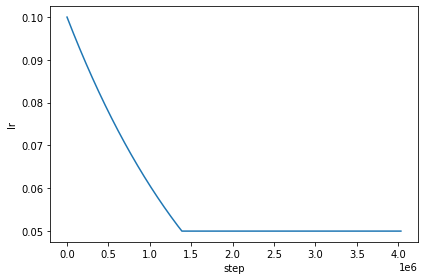

<Figure size 432x288 with 0 Axes>

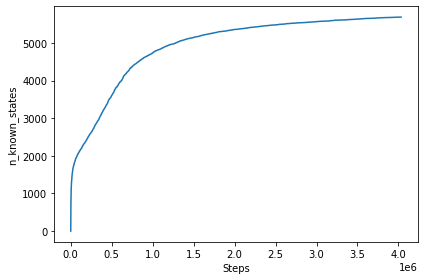

<Figure size 432x288 with 0 Axes>

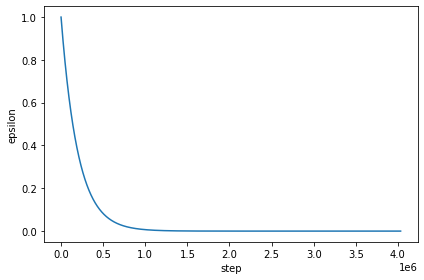

<Figure size 432x288 with 0 Axes>

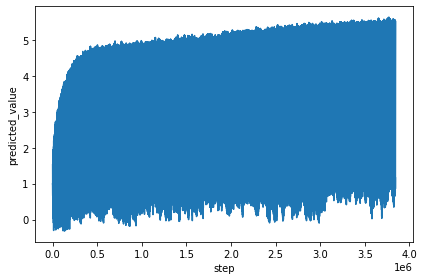

['00500', '01000', '01500', '02000', '02500', '03000', '03500', '04000', '04500', '05000', '05500', '06000', '06500', '07000', '07500', '08000', '08500', '09000', '09500', '10000', '10500', '11000', '11500', '12000', '12500', '13000', '13500', '14000', '14500', '15000', '15500', '16000', '16500', '17000', '17500', '18000', '18500', '19000', '19500', '20000', '20500', '21000', '21500', '22000', '22500', '23000', '23500', '24000', '24500', '25000', '25500', '26000', '26500', '27000', '27500', '28000', '28500', '29000', '29500', '30000', '30500', '31000', '31500', '32000', '32500', '33000', '33500', '34000', '34500', '35000', '35500', '36000', '36500', '37000', '37500', '38000', '38500', '39000', '39500', '40000', '40500', '41000', '41500', '42000', '42500', '43000', '43500', '44000', '44500', '45000', '45500', '46000', '46500', '47000', '47500', '48000', '48500', '49000', '49500', '50000', '50500', '51000', '51500', '52000', '52500', '53000', '53500', '54000', '54500', '55000', '55500', 

<Figure size 432x288 with 0 Axes>

interactive(children=(SelectionSlider(description='file', index=119, options=('00500', '01000', '01500', '0200…

In [16]:
a.plot_stats(save_dir=None)
view_videos(a)

In [15]:
#a.policy.epsilon = 0.05
#a.policy.epsilon_decay = 5e-6
#a.value_function.lr = 0.5
#a.value_function.default_value = 4
#a.policy.epsilon_min = 0
a.train(10000,500, test_callbacks=[show_last_video])

Training episode (50001) done with score = 14.270000000000032
Training episode (50002) done with score = 5.370000000000009
Training episode (50003) done with score = 13.650000000000023
Training episode (50004) done with score = 10.730000000000022
Training episode (50005) done with score = 9.680000000000023
Training episode (50006) done with score = 9.010000000000016
Training episode (50007) done with score = 8.230000000000011
Training episode (50008) done with score = 13.490000000000023
Training episode (50009) done with score = 6.32000000000001
Training episode (50010) done with score = 5.560000000000004
Training episode (50011) done with score = 9.410000000000007
Training episode (50012) done with score = 12.420000000000027
Training episode (50013) done with score = 15.68000000000002
Training episode (50014) done with score = 8.450000000000006
Training episode (50015) done with score = 13.740000000000022
Training episode (50016) done with score = 14.610000000000024
Training episode (

Training episode (50501) done with score = 17.079999999999984
Training episode (50502) done with score = 6.340000000000011
Training episode (50503) done with score = 12.590000000000025
Training episode (50504) done with score = 11.85000000000002
Training episode (50505) done with score = 17.06999999999999
Training episode (50506) done with score = 3.6000000000000023
Training episode (50507) done with score = 16.16000000000001
Training episode (50508) done with score = 13.040000000000015
Training episode (50509) done with score = 9.980000000000015
Training episode (50510) done with score = 16.41
Training episode (50511) done with score = 12.200000000000014
Training episode (50512) done with score = 9.810000000000022
Training episode (50513) done with score = 17.220000000000006
Training episode (50514) done with score = 12.810000000000024
Training episode (50515) done with score = 10.84000000000002
Training episode (50516) done with score = 9.490000000000025
Training episode (50517) done

Training episode (51001) done with score = 15.670000000000021
Training episode (51002) done with score = 2.84
Training episode (51003) done with score = 16.880000000000003
Training episode (51004) done with score = 9.250000000000012
Training episode (51005) done with score = 5.620000000000003
Training episode (51006) done with score = 18.339999999999986
Training episode (51007) done with score = 7.930000000000016
Training episode (51008) done with score = 11.920000000000016
Training episode (51009) done with score = 15.66000000000002
Training episode (51010) done with score = 13.710000000000022
Training episode (51011) done with score = 9.72000000000002
Training episode (51012) done with score = 8.280000000000012
Training episode (51013) done with score = 9.960000000000017
Training episode (51014) done with score = 14.640000000000025
Training episode (51015) done with score = 18.32999999999993
Training episode (51016) done with score = 12.87000000000002
Training episode (51017) done wi

Training episode (51501) done with score = 18.829999999999952
Training episode (51502) done with score = 11.870000000000019
Training episode (51503) done with score = 13.080000000000036
Training episode (51504) done with score = 10.690000000000023
Training episode (51505) done with score = 12.920000000000018
Training episode (51506) done with score = 19.549999999999965
Training episode (51507) done with score = 13.690000000000026
Training episode (51508) done with score = 16.600000000000012
Training episode (51509) done with score = 12.85000000000002
Training episode (51510) done with score = 11.930000000000017
Training episode (51511) done with score = 6.290000000000007
Training episode (51512) done with score = 10.990000000000018
Training episode (51513) done with score = 13.510000000000026
Training episode (51514) done with score = 12.150000000000015
Training episode (51515) done with score = 8.050000000000017
Training episode (51516) done with score = 9.200000000000015
Training epi

Training episode (52001) done with score = 14.000000000000018
Training episode (52002) done with score = 11.970000000000017
Training episode (52003) done with score = 12.640000000000025
Training episode (52004) done with score = 8.340000000000009
Training episode (52005) done with score = 17.220000000000027
Training episode (52006) done with score = 8.810000000000018
Training episode (52007) done with score = 12.950000000000019
Training episode (52008) done with score = 9.29000000000001
Training episode (52009) done with score = 11.600000000000025
Training episode (52010) done with score = 10.990000000000018
Training episode (52011) done with score = 15.580000000000018
Training episode (52012) done with score = 12.850000000000037
Training episode (52013) done with score = 7.070000000000016
Training episode (52014) done with score = 10.980000000000016
Training episode (52015) done with score = 19.25999999999997
Training episode (52016) done with score = 6.420000000000008
Training episod

Training episode (52501) done with score = 11.910000000000018
Training episode (52502) done with score = 11.720000000000018
Training episode (52503) done with score = 11.890000000000018
Training episode (52504) done with score = 17.419999999999987
Training episode (52505) done with score = 11.950000000000019
Training episode (52506) done with score = 8.340000000000009
Training episode (52507) done with score = 12.990000000000018
Training episode (52508) done with score = 6.4400000000000075
Training episode (52509) done with score = 16.410000000000018
Training episode (52510) done with score = 13.520000000000026
Training episode (52511) done with score = 14.680000000000021
Training episode (52512) done with score = 8.960000000000017
Training episode (52513) done with score = 4.500000000000004
Training episode (52514) done with score = 10.210000000000008
Training episode (52515) done with score = 15.850000000000017
Training episode (52516) done with score = 17.30999999999995
Training epi

Training episode (53001) done with score = 18.119999999999962
Training episode (53002) done with score = 10.010000000000016
Training episode (53003) done with score = 10.950000000000017
Training episode (53004) done with score = 12.760000000000023
Training episode (53005) done with score = 9.83000000000002
Training episode (53006) done with score = 13.690000000000024
Training episode (53007) done with score = 9.060000000000016
Training episode (53008) done with score = 9.660000000000023
Training episode (53009) done with score = 12.890000000000018
Training episode (53010) done with score = 13.88000000000002
Training episode (53011) done with score = 12.580000000000025
Training episode (53012) done with score = 10.900000000000018
Training episode (53013) done with score = 11.780000000000019
Training episode (53014) done with score = 13.530000000000028
Training episode (53015) done with score = 12.650000000000025
Training episode (53016) done with score = 20.21999999999996
Training episo

Training episode (53501) done with score = 15.53000000000001
Training episode (53502) done with score = 14.89000000000002
Training episode (53503) done with score = 10.86000000000002
Training episode (53504) done with score = 14.730000000000022
Training episode (53505) done with score = 25.399999999999856
Training episode (53506) done with score = 10.130000000000011
Training episode (53507) done with score = 6.460000000000009
Training episode (53508) done with score = 20.139999999999976
Training episode (53509) done with score = 9.940000000000019
Training episode (53510) done with score = 5.480000000000005
Training episode (53511) done with score = 13.380000000000024
Training episode (53512) done with score = 12.73000000000002
Training episode (53513) done with score = 21.66999999999991
Training episode (53514) done with score = 15.880000000000033
Training episode (53515) done with score = 7.150000000000015
Training episode (53516) done with score = 15.69000000000002
Training episode (

Training episode (54001) done with score = 10.110000000000015
Training episode (54002) done with score = 15.320000000000016
Training episode (54003) done with score = 9.140000000000013
Training episode (54004) done with score = 9.720000000000022
Training episode (54005) done with score = 13.060000000000016
Training episode (54006) done with score = 12.650000000000023
Training episode (54007) done with score = 12.730000000000022
Training episode (54008) done with score = 10.130000000000015
Training episode (54009) done with score = 6.23000000000001
Training episode (54010) done with score = 22.48999999999994
Training episode (54011) done with score = 8.210000000000012
Training episode (54012) done with score = 8.910000000000014
Training episode (54013) done with score = 10.85000000000002
Training episode (54014) done with score = 9.88000000000002
Training episode (54015) done with score = 16.510000000000005
Training episode (54016) done with score = 9.27000000000001
Training episode (54

Training episode (54501) done with score = 18.79999999999997
Training episode (54502) done with score = 7.310000000000009
Training episode (54503) done with score = 9.970000000000013
Training episode (54504) done with score = 15.800000000000017
Training episode (54505) done with score = 6.4700000000000095
Training episode (54506) done with score = 4.450000000000004
Training episode (54507) done with score = 13.630000000000022
Training episode (54508) done with score = 15.410000000000027
Training episode (54509) done with score = 15.390000000000017
Training episode (54510) done with score = 13.670000000000025
Training episode (54511) done with score = 13.41000000000003
Training episode (54512) done with score = 16.59999999999996
Training episode (54513) done with score = 15.630000000000011
Training episode (54514) done with score = 15.34000000000002
Training episode (54515) done with score = 12.040000000000015
Training episode (54516) done with score = 19.849999999999987
Training episod

Training episode (55001) done with score = 12.110000000000015
Training episode (55002) done with score = 9.850000000000017
Training episode (55003) done with score = 16.440000000000015
Training episode (55004) done with score = 15.450000000000012
Training episode (55005) done with score = 9.850000000000021
Training episode (55006) done with score = 5.480000000000006
Training episode (55007) done with score = 7.130000000000013
Training episode (55008) done with score = 8.920000000000016
Training episode (55009) done with score = 9.870000000000019
Training episode (55010) done with score = 5.390000000000006
Training episode (55011) done with score = 12.650000000000025
Training episode (55012) done with score = 10.960000000000017
Training episode (55013) done with score = 8.35000000000001
Training episode (55014) done with score = 11.610000000000024
Training episode (55015) done with score = 15.510000000000021
Training episode (55016) done with score = 12.690000000000024
Training episode 

Training episode (55501) done with score = 10.970000000000017
Training episode (55502) done with score = 13.740000000000023
Training episode (55503) done with score = 6.350000000000007
Training episode (55504) done with score = 10.610000000000024
Training episode (55505) done with score = 10.190000000000015
Training episode (55506) done with score = 10.170000000000016
Training episode (55507) done with score = 10.050000000000017
Training episode (55508) done with score = 20.029999999999912
Training episode (55509) done with score = 18.18999999999997
Training episode (55510) done with score = 12.01000000000002
Training episode (55511) done with score = 0.8199999999999998
Training episode (55512) done with score = 7.2600000000000104
Training episode (55513) done with score = 2.74
Training episode (55514) done with score = 8.270000000000007
Training episode (55515) done with score = 7.320000000000007
Training episode (55516) done with score = 20.649999999999956
Training episode (55517) do

Training episode (56001) done with score = 14.280000000000031
Training episode (56002) done with score = 10.070000000000016
Training episode (56003) done with score = 14.480000000000025
Training episode (56004) done with score = 13.710000000000019
Training episode (56005) done with score = 13.270000000000033
Training episode (56006) done with score = 9.070000000000013
Training episode (56007) done with score = 11.050000000000017
Training episode (56008) done with score = 10.740000000000022
Training episode (56009) done with score = 12.990000000000018
Training episode (56010) done with score = 9.040000000000015
Training episode (56011) done with score = 16.67999999999996
Training episode (56012) done with score = 15.809999999999983
Training episode (56013) done with score = 14.090000000000035
Training episode (56014) done with score = 6.370000000000008
Training episode (56015) done with score = 9.060000000000016
Training episode (56016) done with score = 6.290000000000008
Training episo

Training episode (56501) done with score = 9.970000000000018
Training episode (56502) done with score = 13.790000000000022
Training episode (56503) done with score = 15.670000000000021
Training episode (56504) done with score = 9.40000000000001
Training episode (56505) done with score = 10.110000000000014
Training episode (56506) done with score = 14.80000000000002
Training episode (56507) done with score = 8.970000000000018
Training episode (56508) done with score = 10.670000000000021
Training episode (56509) done with score = 15.290000000000022
Training episode (56510) done with score = 13.92000000000002
Training episode (56511) done with score = 12.76000000000002
Training episode (56512) done with score = 14.37000000000003
Training episode (56513) done with score = 13.100000000000033
Training episode (56514) done with score = 11.690000000000023
Training episode (56515) done with score = 15.980000000000006
Training episode (56516) done with score = 14.460000000000027
Training episode

Training episode (57001) done with score = 12.81000000000002
Training episode (57002) done with score = 12.480000000000029
Training episode (57003) done with score = 14.570000000000023
Training episode (57004) done with score = 13.570000000000023
Training episode (57005) done with score = 19.81999999999996
Training episode (57006) done with score = 12.630000000000024
Training episode (57007) done with score = 11.130000000000013
Training episode (57008) done with score = 13.760000000000021
Training episode (57009) done with score = 13.110000000000035
Training episode (57010) done with score = 9.000000000000014
Training episode (57011) done with score = 16.220000000000002
Training episode (57012) done with score = 16.219999999999985
Training episode (57013) done with score = 10.900000000000016
Training episode (57014) done with score = 14.180000000000033
Training episode (57015) done with score = 16.12000000000001
Training episode (57016) done with score = 11.650000000000022
Training epi

Training episode (57501) done with score = 20.30999999999994
Training episode (57502) done with score = 12.640000000000024
Training episode (57503) done with score = 8.37000000000001
Training episode (57504) done with score = 11.210000000000013
Training episode (57505) done with score = 10.92000000000002
Training episode (57506) done with score = 6.300000000000008
Training episode (57507) done with score = 9.040000000000013
Training episode (57508) done with score = 14.570000000000025
Training episode (57509) done with score = 14.84000000000002
Training episode (57510) done with score = 3.730000000000002
Training episode (57511) done with score = 5.430000000000006
Training episode (57512) done with score = 11.770000000000023
Training episode (57513) done with score = 9.110000000000017
Training episode (57514) done with score = 7.480000000000006
Training episode (57515) done with score = 9.860000000000017
Training episode (57516) done with score = 11.690000000000024
Training episode (57

Training episode (58001) done with score = 12.880000000000017
Training episode (58002) done with score = 11.930000000000017
Training episode (58003) done with score = 9.100000000000014
Training episode (58004) done with score = 11.420000000000028
Training episode (58005) done with score = 11.84000000000002
Training episode (58006) done with score = 10.28000000000001
Training episode (58007) done with score = 17.849999999999977
Training episode (58008) done with score = 16.040000000000003
Training episode (58009) done with score = 10.040000000000015
Training episode (58010) done with score = 8.010000000000014
Training episode (58011) done with score = 9.090000000000014
Training episode (58012) done with score = 12.400000000000027
Training episode (58013) done with score = 18.049999999999965
Training episode (58014) done with score = 12.870000000000022
Training episode (58015) done with score = 8.240000000000013
Training episode (58016) done with score = 12.560000000000025
Training episo

Training episode (58501) done with score = 12.920000000000018
Training episode (58502) done with score = 4.330000000000006
Training episode (58503) done with score = 13.440000000000028
Training episode (58504) done with score = 10.070000000000014
Training episode (58505) done with score = 13.47000000000003
Training episode (58506) done with score = 10.250000000000012
Training episode (58507) done with score = 14.860000000000019
Training episode (58508) done with score = 6.360000000000007
Training episode (58509) done with score = 5.580000000000005
Training episode (58510) done with score = 14.680000000000023
Training episode (58511) done with score = 10.070000000000014
Training episode (58512) done with score = 20.09999999999995
Training episode (58513) done with score = 6.360000000000009
Training episode (58514) done with score = 18.219999999999985
Training episode (58515) done with score = 11.430000000000028
Training episode (58516) done with score = 4.640000000000006
Training episod

Training episode (59001) done with score = 11.26000000000001
Training episode (59002) done with score = 10.150000000000016
Training episode (59003) done with score = 12.710000000000024
Training episode (59004) done with score = 8.100000000000016
Training episode (59005) done with score = 10.560000000000025
Training episode (59006) done with score = 17.24999999999998
Training episode (59007) done with score = 8.130000000000015
Training episode (59008) done with score = 14.440000000000028
Training episode (59009) done with score = 8.090000000000016
Training episode (59010) done with score = 15.630000000000022
Training episode (59011) done with score = 10.010000000000018
Training episode (59012) done with score = 8.35000000000001
Training episode (59013) done with score = 16.330000000000016
Training episode (59014) done with score = 10.940000000000017
Training episode (59015) done with score = 8.930000000000016
Training episode (59016) done with score = 12.830000000000021
Training episode

Training episode (59501) done with score = 5.300000000000008
Training episode (59502) done with score = 18.299999999999997
Training episode (59503) done with score = 15.62000000000001
Training episode (59504) done with score = 12.940000000000017
Training episode (59505) done with score = 20.40999999999992
Training episode (59506) done with score = 17.340000000000007
Training episode (59507) done with score = 17.51
Training episode (59508) done with score = 16.42000000000002
Training episode (59509) done with score = 14.950000000000038
Training episode (59510) done with score = 14.480000000000027
Training episode (59511) done with score = 12.650000000000025
Training episode (59512) done with score = 17.419999999999984
Training episode (59513) done with score = 10.660000000000025
Training episode (59514) done with score = 16.759999999999998
Training episode (59515) done with score = 9.630000000000022
Training episode (59516) done with score = 16.569999999999997
Training episode (59517) d

<Figure size 432x288 with 0 Axes>

Consultez la [documentation du TP](https://pcouy.github.io/ESGI-M2-IABD/index.html), et particulièrement la [documentation et le code de `agents.snake`](https://pcouy.github.io/ESGI-M2-IABD/code_tp/agents/snake.html) ainsi que [la classe `TabularObservation`](https://pcouy.github.io/ESGI-M2-IABD/code_tp/wrappers/utils.html#TabularObservation).

>Les trois classes concernées héritent toutes de la classe `gym.core.ObservationWrapper`. Trouvez le code de cette classe sur [le dépôt Github d'OpenAI Gym](https://github.com/openai/gym/). À quoi sert cette classe ?
>
>Pourquoi utiliser les classes `TabularObservation` et celles contenues dans `agent.snake` ? Que se serait-il passé si on avait appliqué l'algorithme de *Q-learning* tabulaire naïvement (*ie* sans utiliser ces *wrappers*) ?
>
>Testez l'agent tabulaire pour différentes valeurs des paramètres de `agents.snake.make_tabular_snake_env`.
>
>Que se passe-t-il lorsque la taille de la grille augmente ? Que se passe-t-il si le nombre de niveaux de discrétisation est trop élevé ? trop faible ?
>
>Quelle influence a le paramètre `default_value` ?

## Approximation linéaire de la fonction de valeur

>Consultez les documentations de `agents.snake.make_feature_snake_env` et `value_functions.linear` pour entrainer un agent utilisant une fonction de valeur approximée linéairement.
>
>Un taux d'apprentissage de 0.5 est-t-il toujours adapté ?
>
>Commentez les différences d'apprentissage avec l'agent linéaire (vitesse d'apprentissage, qualité de la stratégie, conséquences des changements de taille de grille)

In [19]:
# Instanciez les classes nécessaires et lancez l'entrainement ici

> Étudiez soigneusement [le code de la fonction de valeur linéaire](https://pcouy.github.io/ESGI-M2-IABD/code_tp/value_functions/linear.html). En quoi cette fonction de valeur s'apparente-t-elle déjà à un "réseau" de neurones contenant un unique neurone ?
> 
> Pouvez vous reconnaitre la ligne de code implémentant la descente de gradient dans la classe `LinearQValue` ?

## Initiation à PyTorch

Pour toutes les implémentations d'apprentissage **profond** (*ie* basées sur des réseaux de neurones) par renforcement de la suite du cours, nous utiliserons le [*framework* **PyTorch**](https://pytorch.org/). 

Commencez par installer la librairie :

```
pip install torch torchvision
```

Vous allez dans un premier temps suivre le [tutoriel d'initiation à PyTorch](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html). Il est vivement conseillé de sauvegarder les notebooks utilisés pour suivre le tutoriel (chaque chapitre du tutoriel est un notebook), afin de conserver une trace qui vous servira de référence pour la suite du cours.

Voici quelques conseils pour tirer profit du tutoriel au maximum :

* Utilisez les cellules *markdown* pour produire des documents qui se suffisent à eux-même. Utilisez les différents niveaux de titres pour vous retrouver facilement dans votre document à l'avenir.
* À toutes les étapes du tutoriel, n'hésitez pas à sortir du chemin tracé et à expérimenter vous même (sur les manipulations de tenseurs, sur le valeurs des hyperparamètres, différentes architectures de réseaux de neurones, etc) sur tout ce qui éveille votre curiosité. Conservez le code de ces expériences dans des cellules de vos *notebooks* et gardez une trace de ce que vous avez découvert (bonnes valeurs des hyperparamètres, piège à éviter sur certaines manipulations de tenseurs, etc)
* Appliquez vous à suivre toutes les étapes du tutoriel, même celles qui vous semblent triviales, et intégrez les dans votre *notebook* à la manière d'une "fiche de révision".
* Usez et abusez de [la documentation](https://pytorch.org/docs/stable/index.html).
* Le code de la dernière partie du tutoriel ("Training a Classifier") peut être lent à exécuter sur certaines machines. Ne pas hésiter à basculer sur [Google Colab](https://colab.research.google.com/) pour cette partie.
* Sollicitez moi autant que nécessaire, à l'oral pendant les séances, ou sur l'espace "Discussions" du *Github*, dès qu'un point vous semble obscure ou vous bloque.

Tous ces conseils, bien que chronophages, vous permettront de dompter au plus vite cet outil complexe. La documentation officielle est un outil précieux, mais votre familiarité avec vos propres notes vous feront gagner beaucoup de temps pour la suite.

Une bonne maitrise de *PyTorch* sera nécessaire pour suivre correctement les exercices pratiques de la suite du cours.

> Après avoir terminé le tutoriel, réimplémentez l'approximation linéaire de la fonction de valeur, en utilisant les outils de PyTorch : 
>
> * Vous remplacerez le tableau *Numpy* `self.weights` dans la classe `LinearQValue` par un module *PyTorch* (classe `Net` ci-dessous), *ie* un réseau de neurones. Ce réseau sera équivalent au réseau implémenté par l'approximation linéaire fournie (classe `LinearQValue`). ([Indice](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html))
> * Au lieu de faire "manuellement" la mise à jour des poids, vous utiliserez un [optimiseur de type Adam](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html#torch.optim.Adam). Vous conserverez tous les paramètres par défaut, à l'exception du taux d'apprentissage que vous ajusterez.

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from code_tp.value_functions.base import DiscreteQFunction

class Net(nn.Module):     
    def __init__(self, input_size, output_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, output_size, True)
        #On initialise les poids à une petite valeur
        self.fc1.weight.data.uniform_(-1e-3,1e-3)
        self.fc1.bias.data.uniform_(-1e-3,1e-3)

    def forward(self, x):
        x = self.fc1(x)
        return x

In [6]:
class TorchLinearQValue(DiscreteQFunction):
    def __init__(self, env, default_value=0, *args, **kwargs):
        super().__init__(env, *args, **kwargs) # A CONSERVER

        self.network = Net( self.observation_space.shape[0], self.action_space.n)
        self.optimizer = torch.optim.Adam(self.network.parameters(), lr=self.lr)

    def __call__(self, state, action):
        return self.from_state(state)[action]
        

    def from_state(self, state):
        state = torch.tensor(state, dtype=torch.float32)
        return self.network(state)
    
    def update(self, state, action, target_value):
        Q = self(state,action)
        if type(target_value) is not torch.Tensor:
            target_value = torch.tensor(target_value, dtype=torch.float32).detach()
        err = F.mse_loss(Q, target_value)
        err.backward()
        self.optimizer.step()
        super().update(state, action, target_value) # A CONSERVER

Votre nouvelle fonction de valeur doit pouvoir remplacer "telle quelle" l'approximation linéaire en *Numpy* fournie (dans l'entrainement de l'agent ci-dessus, vous devez pouvoir remplacer `value_functions.linear.LinearQValue` par `TorchLinearQValue`).

> Instanciez et entrainez un agent utilisant la fonction de valeur que vous venez de définir, et confirmez son bon fonctionnement :

In [7]:
env = agents.snake.make_feature_snake_env(8,False, "unit_vector")
env = wrappers.utils.BoredomWrapper(env, reward_per_step=-0.001)
a=TP.create_agent_from_env(env,
agent_class=agents.base.QLearningAgent,
value_class=TorchLinearQValue,
policy_class=policies.greedy.EGreedyPolicy,
agent_args={
    'gamma':0.99
},
value_args={
    'lr':1e-5, 'lr_decay':5e-7, 'lr_min':1e-5,
    'default_value': 0
},
policy_args={
    'greedy_policy_class': policies.greedy.GreedyQPolicy,
    'epsilon': 1, 'epsilon_decay': 2e-5, 'epsilon_min': 0.05,
    'epsilon_test':0.01
})
%pdb 0
a.train(20000, 500,test_callbacks=[show_last_video])

{'agent_class': 'QLearningAgent', 'value_class': 'TorchLinearQValue', 'policy_class': 'EGreedyPolicy', 'agent_args': {'gamma': 0.99, 'save_dir': 'results/20211214-231803-.BoredomWrapper.SnakeFeatureObservation.AddDirectionToSnakeState.OrderEnforcing.Snake_8x8.Snake-8x8-v0'}, 'value_args': {'lr': 1e-05, 'lr_decay': 5e-07, 'lr_min': 1e-05, 'default_value': 0}, 'policy_args': {'greedy_policy_class': <class 'code_tp.policies.greedy.GreedyQPolicy'>, 'epsilon': 1, 'epsilon_decay': 2e-05, 'epsilon_min': 0.05, 'epsilon_test': 0.01}}
Automatic pdb calling has been turned OFF
Training episode (1) done with score = -1.0039999999999998
Training episode (2) done with score = -1.007
Training episode (3) done with score = -1.007
Training episode (4) done with score = -1.009
Training episode (5) done with score = -1.0119999999999998
Training episode (6) done with score = -1.009
Training episode (7) done with score = -1.003
Training episode (8) done with score = -1.0039999999999998
Training episode (9)

Training episode (501) done with score = -1.005
Training episode (502) done with score = -1.015
Training episode (503) done with score = -1.0019999999999998
Training episode (504) done with score = -1.0139999999999998
Training episode (505) done with score = -1.013
Training episode (506) done with score = -1.0019999999999998
Training episode (507) done with score = -1.003
Training episode (508) done with score = -1.001
Training episode (509) done with score = -1.003
Training episode (510) done with score = -1.0039999999999998
Training episode (511) done with score = -1.001
Training episode (512) done with score = -1.001
Training episode (513) done with score = -1.001
Training episode (514) done with score = -1.0039999999999998
Training episode (515) done with score = -1.0019999999999998
Training episode (516) done with score = -1.001
Training episode (517) done with score = -1.005
Training episode (518) done with score = -1.0039999999999998
Training episode (519) done with score = -1.0

Training episode (1001) done with score = -1.0059999999999998
Training episode (1002) done with score = -1.001
Training episode (1003) done with score = -1.0079999999999998
Training episode (1004) done with score = -1.0039999999999998
Training episode (1005) done with score = -1.0099999999999998
Training episode (1006) done with score = -1.003
Training episode (1007) done with score = -1.001
Training episode (1008) done with score = -1.0159999999999998
Training episode (1009) done with score = -1.001
Training episode (1010) done with score = -1.003
Training episode (1011) done with score = -1.001
Training episode (1012) done with score = -1.0079999999999998
Training episode (1013) done with score = -0.004999999999999893
Training episode (1014) done with score = -1.0099999999999998
Training episode (1015) done with score = -1.019
Training episode (1016) done with score = -1.0059999999999998
Training episode (1017) done with score = -1.0099999999999998
Training episode (1018) done with s

Training episode (1501) done with score = -1.0059999999999998
Training episode (1502) done with score = -1.0059999999999998
Training episode (1503) done with score = -1.015
Training episode (1504) done with score = -1.0219999999999998
Training episode (1505) done with score = -1.003
Training episode (1506) done with score = -1.001
Training episode (1507) done with score = -1.0019999999999998
Training episode (1508) done with score = -1.003
Training episode (1509) done with score = -1.0159999999999998
Training episode (1510) done with score = -1.0079999999999998
Training episode (1511) done with score = -1.0019999999999998
Training episode (1512) done with score = -0.0029999999999998916
Training episode (1513) done with score = -1.013
Training episode (1514) done with score = -1.003
Training episode (1515) done with score = -1.0099999999999998
Training episode (1516) done with score = -1.005
Training episode (1517) done with score = -1.0019999999999998
Training episode (1518) done with 

Training episode (2001) done with score = -0.0039999999999998925
Training episode (2002) done with score = -0.028999999999999915
Training episode (2003) done with score = -0.0039999999999998925
Training episode (2004) done with score = -1.001
Training episode (2005) done with score = -1.005
Training episode (2006) done with score = -1.0079999999999998
Training episode (2007) done with score = -1.003
Training episode (2008) done with score = -1.0039999999999998
Training episode (2009) done with score = -1.0019999999999998
Training episode (2010) done with score = -1.0179999999999998
Training episode (2011) done with score = -1.011
Training episode (2012) done with score = -1.0039999999999998
Training episode (2013) done with score = -1.0099999999999998
Training episode (2014) done with score = -1.003
Training episode (2015) done with score = -1.0039999999999998
Training episode (2016) done with score = -1.007
Training episode (2017) done with score = -0.015999999999999903
Training episo

Training episode (2501) done with score = -1.003
Training episode (2502) done with score = -0.0129999999999999
Training episode (2503) done with score = -0.007999999999999896
Training episode (2504) done with score = -1.005
Training episode (2505) done with score = -1.003
Training episode (2506) done with score = -1.017
Training episode (2507) done with score = -1.001
Training episode (2508) done with score = -1.001
Training episode (2509) done with score = -0.014999999999999902
Training episode (2510) done with score = -1.001
Training episode (2511) done with score = -1.003
Training episode (2512) done with score = -1.005
Training episode (2513) done with score = -0.02399999999999991
Training episode (2514) done with score = -1.005
Training episode (2515) done with score = -1.003
Training episode (2516) done with score = -1.015
Training episode (2517) done with score = -1.003
Training episode (2518) done with score = -1.003
Training episode (2519) done with score = -1.0119999999999998

Training episode (3001) done with score = -1.0019999999999998
Training episode (3002) done with score = -1.001
Training episode (3003) done with score = -1.0119999999999998
Training episode (3004) done with score = -0.0129999999999999
Training episode (3005) done with score = -1.0039999999999998
Training episode (3006) done with score = -1.009
Training episode (3007) done with score = -1.001
Training episode (3008) done with score = -1.0039999999999998
Training episode (3009) done with score = -1.007
Training episode (3010) done with score = -1.003
Training episode (3011) done with score = -1.0099999999999998
Training episode (3012) done with score = -1.005
Training episode (3013) done with score = -1.009
Training episode (3014) done with score = -1.0019999999999998
Training episode (3015) done with score = -1.0079999999999998
Training episode (3016) done with score = -1.003
Training episode (3017) done with score = -1.0019999999999998
Training episode (3018) done with score = -1.017
T

Training episode (3501) done with score = -1.001
Training episode (3502) done with score = -0.02199999999999991
Training episode (3503) done with score = -1.0139999999999998
Training episode (3504) done with score = -0.0119999999999999
Training episode (3505) done with score = -0.0029999999999998916
Training episode (3506) done with score = 0.9660000000000002
Training episode (3507) done with score = -1.003
Training episode (3508) done with score = -1.0059999999999998
Training episode (3509) done with score = -1.013
Training episode (3510) done with score = -1.001
Training episode (3511) done with score = -1.007
Training episode (3512) done with score = -1.009
Training episode (3513) done with score = -1.0119999999999998
Training episode (3514) done with score = -1.019
Training episode (3515) done with score = -1.005
Training episode (3516) done with score = -1.0019999999999998
Training episode (3517) done with score = -1.007
Training episode (3518) done with score = -1.009999999999999

Training episode (4001) done with score = -1.0059999999999998
Training episode (4002) done with score = -1.0019999999999998
Training episode (4003) done with score = 0.9840000000000004
Training episode (4004) done with score = 0.9900000000000004
Training episode (4005) done with score = 0.9730000000000008
Training episode (4006) done with score = -0.014999999999999902
Training episode (4007) done with score = -1.001
Training episode (4008) done with score = -1.0139999999999998
Training episode (4009) done with score = -1.0019999999999998
Training episode (4010) done with score = -0.019999999999999907
Training episode (4011) done with score = -0.006999999999999895
Training episode (4012) done with score = -0.020999999999999908
Training episode (4013) done with score = -1.011
Training episode (4014) done with score = -1.007
Training episode (4015) done with score = -0.0129999999999999
Training episode (4016) done with score = -0.009999999999999898
Training episode (4017) done with score 

Training episode (4501) done with score = -1.001
Training episode (4502) done with score = -1.0059999999999998
Training episode (4503) done with score = 0.9910000000000001
Training episode (4504) done with score = -1.001
Training episode (4505) done with score = -1.0099999999999998
Training episode (4506) done with score = -1.0019999999999998
Training episode (4507) done with score = -1.0139999999999998
Training episode (4508) done with score = -1.015
Training episode (4509) done with score = -0.0039999999999998925
Training episode (4510) done with score = -1.001
Training episode (4511) done with score = -1.003
Training episode (4512) done with score = -1.001
Training episode (4513) done with score = -1.0079999999999998
Training episode (4514) done with score = -1.019
Training episode (4515) done with score = -1.0279999999999998
Training episode (4516) done with score = -1.003
Training episode (4517) done with score = -1.001
Training episode (4518) done with score = -1.013
Training epi

Training episode (5001) done with score = -1.003
Training episode (5002) done with score = -1.003
Training episode (5003) done with score = -1.0059999999999998
Training episode (5004) done with score = -1.0019999999999998
Training episode (5005) done with score = -1.0099999999999998
Training episode (5006) done with score = -1.029
Training episode (5007) done with score = -1.0039999999999998
Training episode (5008) done with score = -1.0059999999999998
Training episode (5009) done with score = -0.02199999999999991
Training episode (5010) done with score = -1.005
Training episode (5011) done with score = -1.003
Training episode (5012) done with score = -1.0019999999999998
Training episode (5013) done with score = -1.003
Training episode (5014) done with score = -1.0019999999999998
Training episode (5015) done with score = -0.009999999999999898
Training episode (5016) done with score = 0.9840000000000002
Training episode (5017) done with score = -1.0039999999999998
Training episode (5018

Training episode (5501) done with score = -1.0039999999999998
Training episode (5502) done with score = -1.0019999999999998
Training episode (5503) done with score = -1.0019999999999998
Training episode (5504) done with score = -1.017
Training episode (5505) done with score = -1.0059999999999998
Training episode (5506) done with score = -0.004999999999999893
Training episode (5507) done with score = -1.0019999999999998
Training episode (5508) done with score = -1.0019999999999998
Training episode (5509) done with score = -1.003
Training episode (5510) done with score = -1.0019999999999998
Training episode (5511) done with score = -1.0339999999999998
Training episode (5512) done with score = -1.001
Training episode (5513) done with score = -1.017
Training episode (5514) done with score = -0.0129999999999999
Training episode (5515) done with score = -1.005
Training episode (5516) done with score = -1.0019999999999998
Training episode (5517) done with score = -1.001
Training episode (5518

Training episode (6001) done with score = -1.0039999999999998
Training episode (6002) done with score = -1.0039999999999998
Training episode (6003) done with score = -1.0019999999999998
Training episode (6004) done with score = -1.005
Training episode (6005) done with score = -1.0019999999999998
Training episode (6006) done with score = -1.001
Training episode (6007) done with score = -1.001
Training episode (6008) done with score = -1.0079999999999998
Training episode (6009) done with score = -1.0119999999999998
Training episode (6010) done with score = -1.001
Training episode (6011) done with score = -1.005
Training episode (6012) done with score = -1.003
Training episode (6013) done with score = -1.003
Training episode (6014) done with score = -1.001
Training episode (6015) done with score = -1.0079999999999998
Training episode (6016) done with score = -1.001
Training episode (6017) done with score = -1.003
Training episode (6018) done with score = -1.001
Training episode (6019) don

Training episode (6501) done with score = -1.005
Training episode (6502) done with score = -1.0059999999999998
Training episode (6503) done with score = -1.0019999999999998
Training episode (6504) done with score = -1.003
Training episode (6505) done with score = -1.001
Training episode (6506) done with score = -1.0039999999999998
Training episode (6507) done with score = -1.0079999999999998
Training episode (6508) done with score = -1.0019999999999998
Training episode (6509) done with score = -1.003
Training episode (6510) done with score = -1.001
Training episode (6511) done with score = -1.001
Training episode (6512) done with score = -0.02399999999999991
Training episode (6513) done with score = -1.001
Training episode (6514) done with score = -1.005
Training episode (6515) done with score = -1.001
Training episode (6516) done with score = -1.003
Training episode (6517) done with score = -1.001
Training episode (6518) done with score = -1.0039999999999998
Training episode (6519) do

Training episode (7001) done with score = -1.0119999999999998
Training episode (7002) done with score = -0.02399999999999991
Training episode (7003) done with score = -1.003
Training episode (7004) done with score = -0.02199999999999991
Training episode (7005) done with score = -0.0129999999999999
Training episode (7006) done with score = -0.014999999999999902
Training episode (7007) done with score = -1.0019999999999998
Training episode (7008) done with score = -0.006999999999999895
Training episode (7009) done with score = -0.027999999999999914
Training episode (7010) done with score = -1.003
Training episode (7011) done with score = -1.003
Training episode (7012) done with score = -1.0059999999999998
Training episode (7013) done with score = -0.014999999999999902
Training episode (7014) done with score = -1.003
Training episode (7015) done with score = -1.003
Training episode (7016) done with score = -0.0029999999999998916
Training episode (7017) done with score = -1.019999999999999

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

La fonction de valeur que vous venez d'implémenter (classe `TorchLinearQValue`) peut désormais vous servir de base pour créer des fonctions de valeur *neurales* arbitrairement complexes (attention cependant à la dimension des observations qui doit être égale à la dimension des *inputs* du réseau de neurone).

> Reprenez votre classe `Net` + le code d'instanciation et d'endtrainement ci-dessus. Copiez-collez les ci-dessous. Modifiez la classe Net pour expérimenter avec l'architecture du réseau de neurones. Avant de tester chaque modification, essayez de prédire ses conséquences sur l'apprentissage de l'agent.
>
> * Ajoutez une couche au réseau de neurones. Faites varier la taille de cette couche.
> * Si vous trouvez une bonne valeur pour la taille de cette nouvelle couche, essayez d'ajouter plus de couches de la même taille.
>
> Quelle sont les conséquences de ces modifications sur l'apprentissage de l'agent ? Attendiez-vous ce résultat ?